In [1]:
import fastf1
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting as f1_plt
import pandas as pd
import utils as ut

In [2]:
# gettting the data
session = ut.get_session()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /Users/borch_and/Library/Caches/fastf1.
	Size: 96.69 MB
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.0.0]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['20', '1', '63', '4', '55', '31', '14', '44', '11', '16', '23', '10', '5', '3', '18', '6', '24', '77', '22', '47']


In [3]:
q1, q2, q3 = ut.get_qualifying(session)
fast_mag = q3.pick_driver('MAG')
fast_ver = q3.pick_driver('VER')

In [4]:
best_lap_mag = fast_mag.pick_lap(25).get_car_data()
best_lap_tel_mag = fast_mag.pick_lap(25).get_telemetry()

best_lap_ver = fast_ver.pick_lap(22).get_car_data()
best_lap_tel_ver = fast_ver.pick_lap(22).get_telemetry()

In [5]:
x_mag = best_lap_tel_mag["X"]
y_mag = best_lap_tel_mag["Y"]
x_ver = best_lap_tel_ver["X"]
y_ver = best_lap_tel_ver["Y"]

In [6]:
best_lap_tel_mag["DistanceToDriverAhead"] = 1
best_lap_tel_mag 

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-11-11 19:49:20.002,0 days 01:03:15.212000,,1,0 days 00:00:00,11327,318,8,99,False,12,interpolation,0.000177,4.091379e-08,OnTrack,-4175,-2166,7767
3,2022-11-11 19:49:20.011,0 days 01:03:15.221000,,1,0 days 00:00:00.009000,11337,318,8,99,False,12,car,0.795000,1.841595e-04,OnTrack,-4173,-2174,7768
4,2022-11-11 19:49:20.169,0 days 01:03:15.379000,,1,0 days 00:00:00.167000,11349,318,8,99,False,12,pos,14.745375,3.415724e-03,OnTrack,-4139,-2310,7772
5,2022-11-11 19:49:20.389,0 days 01:03:15.599000,,1,0 days 00:00:00.387000,11361,318,8,99,False,12,pos,34.181747,7.918105e-03,OnTrack,-4091,-2498,7777
6,2022-11-11 19:49:20.411,0 days 01:03:15.621000,,1,0 days 00:00:00.409000,11373,318,8,99,False,12,car,36.128333,8.369026e-03,OnTrack,-4086,-2515,7777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2022-11-11 19:50:30.970,0 days 01:04:26.180000,,1,0 days 00:01:10.968000,11371,319,8,99,False,12,car,4183.044444,9.689904e-01,OnTrack,-4314,-1609,7752
538,2022-11-11 19:50:31.290,0 days 01:04:26.500000,,1,0 days 00:01:11.288000,11354,320,8,99,False,12,car,4211.488889,9.755795e-01,OnTrack,-4267,-1802,7755
539,2022-11-11 19:50:31.308,0 days 01:04:26.518000,,1,0 days 00:01:11.306000,11320,319,8,99,False,12,pos,4213.086499,9.759496e-01,OnTrack,-4264,-1815,7756
540,2022-11-11 19:50:31.508,0 days 01:04:26.718000,,1,0 days 00:01:11.506000,11286,318,8,99,False,12,pos,4230.801558,9.800532e-01,OnTrack,-4220,-1993,7763


In [7]:
best_lap_tel_ver

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-11-11 19:49:37.225,0 days 01:03:32.435000,,383.686111,0 days 00:00:00,11441,324,8,100,False,12,interpolation,-0.001650,-3.881358e-07,OnTrack,-4155,-2243,7769
3,2022-11-11 19:49:37.410,0 days 01:03:32.620000,,383.686111,0 days 00:00:00.185000,11459,324,8,100,False,12,car,16.650000,3.916901e-03,OnTrack,-4110,-2423,7775
4,2022-11-11 19:49:37.429,0 days 01:03:32.639000,,383.686111,0 days 00:00:00.204000,11517,324,8,100,False,12,pos,18.362488,4.319762e-03,OnTrack,-4107,-2438,7776
5,2022-11-11 19:49:37.650,0 days 01:03:32.860000,55,383.686111,0 days 00:00:00.425000,11576,325,8,100,False,12,car,38.316667,9.013968e-03,OnTrack,-4078,-2551,7780
6,2022-11-11 19:49:37.789,0 days 01:03:32.999000,55,379.752778,0 days 00:00:00.564000,11547,325,8,100,False,12,pos,50.903871,1.197510e-02,OnTrack,-4058,-2631,7783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2022-11-11 19:50:48.709,0 days 01:04:43.919000,55,435.513611,0 days 00:01:11.484000,11465,323,8,100,False,12,pos,4194.579424,9.867718e-01,OnTrack,-4274,-1777,7756
538,2022-11-11 19:50:48.771,0 days 01:04:43.981000,55,428.413611,0 days 00:01:11.546000,11448,324,8,100,False,12,car,4200.165556,9.880859e-01,OnTrack,-4260,-1831,7758
539,2022-11-11 19:50:49.011,0 days 01:04:44.221000,55,414.213611,0 days 00:01:11.786000,11479,325,8,100,False,12,car,4221.832222,9.931830e-01,OnTrack,-4198,-2078,7767
540,2022-11-11 19:50:49.069,0 days 01:04:44.279000,55,414.213611,0 days 00:01:11.844000,11409,325,8,100,False,12,pos,4227.077123,9.944169e-01,OnTrack,-4184,-2133,7767


In [8]:
best_lap_tel_ver.where(best_lap_tel_ver["Source"] == "pos").dropna()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
4,2022-11-11 19:49:37.429,0 days 01:03:32.639000,,383.686111,0 days 00:00:00.204000,11517.0,324.0,8.0,100.0,False,12.0,pos,18.362488,0.004320,OnTrack,-4107.0,-2438.0,7776.0
6,2022-11-11 19:49:37.789,0 days 01:03:32.999000,55,379.752778,0 days 00:00:00.564000,11547.0,325.0,8.0,100.0,False,12.0,pos,50.903871,0.011975,OnTrack,-4058.0,-2631.0,7783.0
9,2022-11-11 19:49:38.109,0 days 01:03:33.319000,55,361.752778,0 days 00:00:00.884000,11511.0,326.0,8.0,100.0,False,12.0,pos,79.907027,0.018798,OnTrack,-3977.0,-2937.0,7792.0
12,2022-11-11 19:49:38.488,0 days 01:03:33.698000,55,340.647222,0 days 00:00:01.263000,11524.0,327.0,8.0,100.0,False,12.0,pos,114.335337,0.026897,OnTrack,-3881.0,-3296.0,7801.0
14,2022-11-11 19:49:38.928,0 days 01:03:34.138000,55,327.152778,0 days 00:00:01.703000,11526.0,327.0,8.0,100.0,False,12.0,pos,154.281432,0.036295,OnTrack,-3791.0,-3630.0,7807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,2022-11-11 19:50:47.809,0 days 01:04:43.019000,55,481.424722,0 days 00:01:10.584000,11372.0,320.0,8.0,100.0,False,12.0,pos,4113.930947,0.967799,OnTrack,-4448.0,-1029.0,7743.0
534,2022-11-11 19:50:48.249,0 days 01:04:43.459000,55,456.546944,0 days 00:01:11.024000,11440.0,322.0,8.0,100.0,False,12.0,pos,4153.252648,0.977050,OnTrack,-4374.0,-1361.0,7747.0
535,2022-11-11 19:50:48.469,0 days 01:04:43.679000,55,449.580278,0 days 00:01:11.244000,11461.0,322.0,8.0,100.0,False,12.0,pos,4172.994220,0.981694,OnTrack,-4319.0,-1592.0,7752.0
537,2022-11-11 19:50:48.709,0 days 01:04:43.919000,55,435.513611,0 days 00:01:11.484000,11465.0,323.0,8.0,100.0,False,12.0,pos,4194.579424,0.986772,OnTrack,-4274.0,-1777.0,7756.0


In [9]:
ani_mag = best_lap_tel_mag.where((best_lap_tel_mag["Source"] == "pos") | (best_lap_tel_mag["Source"] == "interpolation")).dropna()
ani_ver = best_lap_tel_ver.where((best_lap_tel_ver["Source"] == "pos") | (best_lap_tel_ver["Source"] == "interpolation")).dropna()

ani_speed_mag = [speed for speed in ani_mag["Speed"]]
ani_speed_ver = [speed for speed in ani_ver["Speed"]]

ani_x_mag = ani_mag["X"]
ani_x_ver = ani_ver["X"]

ani_y_mag = ani_mag["Y"]
ani_y_ver = ani_ver["Y"]

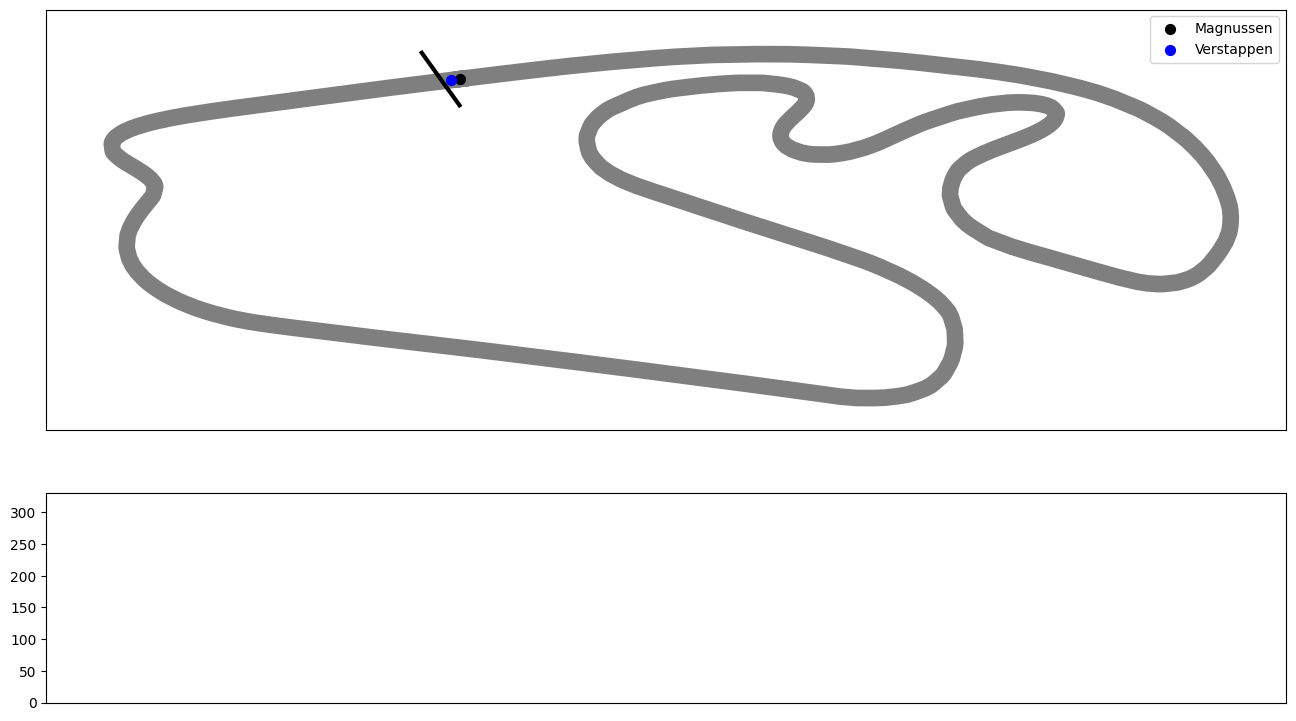

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_plot(i, scat_mag, scat_ver, line_mag, line_ver):
    
    line_mag.set_data(range(i), ani_speed_mag[:i])
    line_ver.set_data(range(i), ani_speed_ver[:i])


    index = ani_mag.index[i]
    plot_x_mag = ani_x_mag[index]
    plot_y_mag = ani_y_mag[index]
    scat_mag.set_offsets((plot_y_mag, -plot_x_mag))



    index = ani_ver.index[i]
    plot_x_ver = ani_x_ver[index]
    plot_y_ver = ani_y_ver[index]
    scat_ver.set_offsets((plot_y_ver, -plot_x_ver))
    
    return scat_mag, scat_ver, line_mag, line_ver

numframes = len(ani_mag)

index = ani_mag.index[0]

plot_x_mag = ani_x_mag[index]
plot_y_mag = ani_y_mag[index]


index = ani_ver.index[0]

plot_x_ver = ani_x_ver[index]
plot_y_ver = ani_y_ver[index]

data = range(numframes)

line_index = ani_mag.index[numframes-1]
line_x = ani_x_mag[index]
line_y = ani_y_mag[index]

fig, ax = plt.subplots(2,1, figsize=(16,9), gridspec_kw={'height_ratios': [2, 1]})

ax[0].plot(y_mag, -x_mag, label='MAG', c="black", linewidth=12, alpha=0.5, zorder = 0)
ax[0].plot([line_y, line_y- 350], [-line_x - 500, -line_x + 500], c = "black", linewidth=3)

speed_line_mag = ax[1].plot(range(0), ani_speed_mag[:0], c="black")
speed_line_ver = ax[1].plot(range(0), ani_speed_ver[:0], c="blue")


scat_mag = ax[0].scatter(plot_y_mag, -plot_x_mag, c="black", s=50)
scat_ver = ax[0].scatter(plot_y_ver, -plot_x_ver, c="blue", s=50)


ax[0].legend([scat_mag, scat_ver], ["Magnussen", "Verstappen"])
ax[0].set_xlim([-6000, 5500])
ax[0].set_ylim([-2500, 5500])
ax[0].xaxis.set_visible(False)
ax[0].yaxis.set_visible(False)

ax[1].set_xlim([0, numframes])
ax[1].set_ylim([0, max(ani_speed_mag)+ 10])
ax[1].xaxis.set_visible(False)



ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                fargs=[scat_mag, scat_ver, speed_line_mag[0], speed_line_ver[0]], blit = False, interval=500, repeat=True)
plt.show()
# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=30,
                                metadata=dict(artist='Sebastian'),
                                bitrate=1800)
ani.save('./figures/lap_animation.gif', writer=writer)

# to save the animation using FFMpegWritter as a mp4
writervideo = animation.FFMpegWriter(fps=30) # brew install ffmpeg (if not working)
ani.save('./figures/lap_animation.mp4', writer=writervideo)


